# Sieci Rekurencyjne

Zapoznaj sie z architektura rekurencyjnych sieci neuronowych i porownanie ich z sieciami CNN.

Literatura obowiazkowa:
- https://pytorch.org/docs/stable/generated/torch.nn.RNN.html
- https://www.analyticsvidhya.com/blog/2021/07/understanding-rnn-step-by-step-with-pytorch/
- https://medium.com/@VersuS_/coding-a-recurrent-neural-network-rnn-from-scratch-using-pytorch-a6c9fc8ed4a7

LSTM, GRU i RNN: https://www.youtube.com/watch?v=0_PgWWmauHk



# Sieci Rekurencyjne

Rekurencyjna sieć neuronowa (RNN) jest specjalnym rodzajem sztucznej sieci neuronowej, która ma zdolność do przetwarzania sekwencji danych. Jest to szczególnie przydatne w przypadku danych, które są ułożone w czasie lub mają inną sekwencyjną strukturę, taką jak zdania w języku naturalnym, sygnały czasowe, czy sekwencje muzyczne.

RNN zawiera cykliczne połączenia wewnątrz sieci, które pozwalają informacji na przechodzenie przez sieć w cykliczny sposób. W każdym kroku czasowym RNN przyjmuje wejście oraz stan ukryty z poprzedniego kroku, a następnie wylicza nowy stan ukryty na podstawie tych informacji. W ten sposób RNN ma zdolność do przetwarzania sekwencji krok po kroku, zachowując informacje z poprzednich kroków.

Ponizej bardzo prosty przyklad:
```python

import torch
import torch.nn as nn

# Definicja Simple RNN
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, hidden):
        out, hidden = self.rnn(x, hidden)
        out = self.fc(out[:, -1, :])  # Pobierz ostatni krok czasowy
        return out, hidden

# Parametry modelu
input_size = 10
hidden_size = 20
output_size = 1

# Przykładowe dane wejściowe
batch_size = 3
seq_length = 5
input_data = torch.randn(batch_size, seq_length, input_size)

# Inicjalizacja modelu
model = SimpleRNN(input_size, hidden_size, output_size)

# Inicjalizacja ukrytego stanu
hidden = torch.zeros(1, batch_size, hidden_size)

output, hidden = model(input_data, hidden)
print("Output shape:", output.shape)  # Output shape: torch.Size([3, 1])
```

<ipython-input-2-94f6706d4a3f>:22: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:275.)
  X = torch.tensor(X).unsqueeze(2).float()


Epoch [1/10], Loss: 0.4951
Epoch [2/10], Loss: 0.4785
Epoch [3/10], Loss: 0.4621
Epoch [4/10], Loss: 0.4460
Epoch [5/10], Loss: 0.4301
Epoch [6/10], Loss: 0.4144
Epoch [7/10], Loss: 0.3987
Epoch [8/10], Loss: 0.3830
Epoch [9/10], Loss: 0.3672
Epoch [10/10], Loss: 0.3510


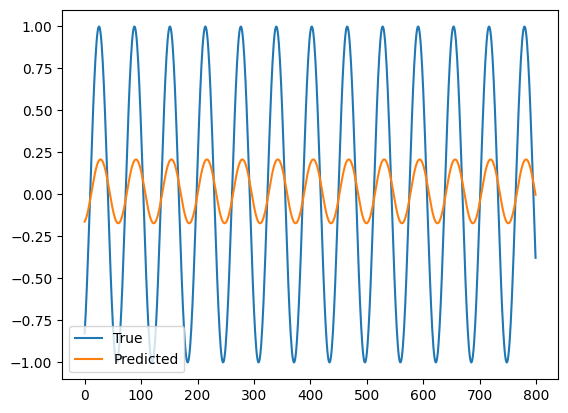

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1: Przygotuj dane treningowe
sequence_length = 1000
total_samples = 5000

# Tworzenie ciągu czasowego za pomocą funkcji sinus
t = np.arange(0, total_samples)
sin_wave = np.sin(0.1 * t)

# Przygotowanie sekwencji wejściowych i wyjściowych
X = []
y = []
for i in range(len(sin_wave) - sequence_length):
    X.append(sin_wave[i:i+sequence_length])
    y.append(sin_wave[i+sequence_length])

# Konwersja na tensory PyTorch
X = torch.tensor(X).unsqueeze(2).float()
y = torch.tensor(y).unsqueeze(1).float()

# Podział danych na zbiór treningowy i testowy (80:20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Zadanie 2: Przygotuj dane treningowe i testowe

# Zadanie 3: Stwórz model sieci rekurencyjnej typu SimpleRNN
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Zadanie 4: Naucz model na danych treningowych
input_size = 1
hidden_size = 32
output_size = 1

model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Zadanie 5: Zwizualizuj wyniki
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

plt.plot(y_test.numpy(), label='True')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()


Epoch [1/10], Loss: 0.5616
Epoch [2/10], Loss: 0.3009
Epoch [3/10], Loss: 0.1926
Epoch [4/10], Loss: 0.4924
Epoch [5/10], Loss: 0.0874
Epoch [6/10], Loss: 0.2251
Epoch [7/10], Loss: 0.0662
Epoch [8/10], Loss: 0.1849
Epoch [9/10], Loss: 0.1098
Epoch [10/10], Loss: 0.0111


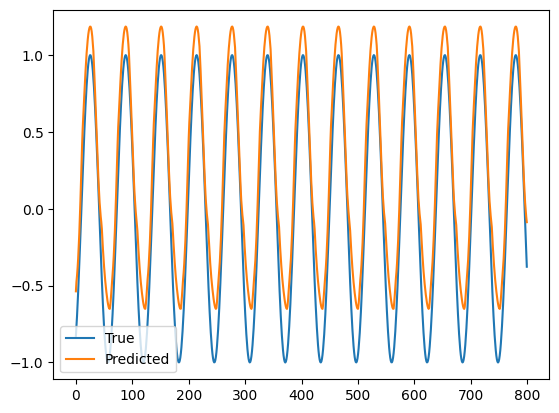

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 1: Przygotuj dane treningowe
sequence_length = 1000
total_samples = 5000

# Tworzenie ciągu czasowego za pomocą funkcji sinus
t = np.arange(0, total_samples)
sin_wave = np.sin(0.1 * t)

# Przygotowanie sekwencji wejściowych i wyjściowych
X = []
y = []
for i in range(len(sin_wave) - sequence_length):
    X.append(sin_wave[i:i+sequence_length])
    y.append(sin_wave[i+sequence_length])

# Konwersja na tensory PyTorch
X = torch.tensor(X).unsqueeze(1).float()
y = torch.tensor(y).unsqueeze(1).float()

# Podział danych na zbiór treningowy i testowy (80:20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Zadanie 2: Przygotuj dane treningowe i testowe

# Zadanie 3: Stwórz model sieci konwolucyjnej (CNN)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 1000, 64)
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Zadanie 4: Naucz model na danych treningowych
model = CNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Zadanie 5: Zwizualizuj wyniki
model.eval()
with torch.no_grad():
    test_predictions = model(X_test)

plt.plot(y_test.numpy(), label='True')
plt.plot(test_predictions.numpy(), label='Predicted')
plt.legend()
plt.show()
